# Analyzing Plato's Dialogues
## Iris Wu (iw5hte@virginia.edu) DS 5001 Spring 2023

## End goal of this notebook:
- Sentiment and emotion values as features in VOCAB or as a separate table with a shared index with the VOCAB table.
- Sentiment polarity and emotions for each document.
- Explore the data.

### Setting up necessary tools:
Importing useful packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from hac2 import HAC

Setting up configuration for data and functions

In [2]:
data_in = 'data/output'
data_out = 'data/output'
data_prefix = 'plato'

In [3]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

OHCO = ['book_id', 'chap_id', 'para_num', 'sent_num', 'token_num']
BOOKS = OHCO[:1]
CHAPS = OHCO[:2]
PARAS = OHCO[:3]
SENTS = OHCO[:4]

republic = 1497
timaeus = 1572
laws = 1750

Importing data

In [4]:
VOCAB = pd.read_csv(f"{data_in}/{data_prefix}-VOCAB-CHAP.csv").set_index('term_str').sort_index()
LIB = pd.read_csv(f"{data_in}/{data_prefix}-LIB.csv").set_index('book_id').sort_index()
BOW = pd.read_csv(f"{data_in}/{data_prefix}-BOW-CHAP.csv").set_index(['book_id','chap_id', 'term_str']).sort_index()
SALEX = pd.read_csv(f'{data_in}/misc/salex_nrc.csv').set_index('term_str')
TOKENS = pd.read_csv(f"{data_in}/{data_prefix}-CORPUS-CHAP.csv").set_index(OHCO).sort_index()

In [5]:
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


Adding sentiment values to vocab table

In [6]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)
V

,n,p,i,n_chars,cat_pos,max_pos,stop,stem_porter,stem_snowball,stem_lancaster,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,,,,,,,,,,,
abandon,1,0.000001,19.494826,7,{'VBP'},VBP,0,abandon,abandon,abandon,...,0,0,1,0,1,0,1,0,0,-1
aberration,1,0.000001,19.494826,10,{'NN'},NN,0,aberr,aberr,aber,...,0,1,0,0,1,0,0,0,0,-1
abhor,1,0.000001,19.494826,5,{'NN'},NN,0,abhor,abhor,abh,...,0,1,1,0,1,0,0,0,0,-1
abject,1,0.000001,19.494826,6,{'JJ'},JJ,0,abject,abject,abject,...,0,1,0,0,1,0,0,0,0,-1
abolish,2,0.000003,18.494826,7,{'VB'},VB,0,abolish,abolish,abol,...,0,0,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yearning,1,0.000001,19.494826,8,{'NN'},NN,0,yearn,yearn,yearn,...,1,0,0,1,1,1,0,0,1,0
young,717,0.000970,10.008997,5,"{'IN', 'NNP', 'NN', 'LS', 'VBZ', 'NNS', 'RB', ...",NNP,0,young,young,young,...,1,0,0,1,0,1,0,1,0,1
youth,239,0.000323,11.593959,5,"{'CC', 'NNP', 'NN', 'NNS', 'VB', 'RB', 'VBN', ...",NN,0,youth,youth,you,...,1,0,1,1,0,1,0,1,0,1


In [7]:
T = TOKENS.join(V, on='term_str').fillna(0)
T

term_str            pos_tuple  \
book_id chap_id para_num sent_num token_num                                   
1497    1       1        0        0                  i         ('I', 'PRP')   
                                  1               went      ('went', 'VBD')   
                                  2               down       ('down', 'RB')   
                                  3          yesterday  ('yesterday', 'NN')   
                                  4                 to         ('to', 'TO')   
...                                                ...                  ...   
1750    12      127      0        5              ebook     ('EBook', 'NNP')   
                                  6                 of         ('of', 'IN')   
                                  7               laws     ('Laws,', 'NNP')   
                                  8                 by         ('by', 'IN')   
                                  9              plato     ('Plato', 'NNP')   

                                             pos  token_str pos_group  \
book_id chap_id para_num sent_num token_num                             
1497    1       1        0        0          PRP          I        PR   
                                  1          VBD       went        VB   
                                  2           RB       down        RB   
                                  3           NN  yesterday        NN   
                                  4           TO         to        TO   
...                                          ...        ...       ...   
1750    12      127      0        5          NNP      EBook        NN   
                                  6           IN         of        IN   
                                  7          NNP      Laws,        NN   
                                  8           IN         by        IN   
                                  9          NNP      Plato        NN   

                                                tfidf    n    p    i  n_chars  \
book_id chap_id para_num sent_num token_num                                     
1497    1       1        0        0          0.002478  0.0  0.0  0.0      0.0   
                                  1          0.000196  0.0  0.0  0.0      0.0   
                                  2          0.000124  0.0  0.0  0.0      0.0   
                                  3          0.000133  0.0  0.0  0.0      0.0   
                                  4          0.000000  0.0  0.0  0.0      0.0   
...                                               ...  ...  ...  ...      ...   
1750    12      127      0        5          0.000091  0.0  0.0  0.0      0.0   
                                  6          0.000000  0.0  0.0  0.0      0.0   
                                  7          0.001053  0.0  0.0  0.0      0.0   
                                  8          0.000000  0.0  0.0  0.0      0.0   
                                  9          0.000064  0.0  0.0  0.0      0.0   

                                             ... anticipation disgust  fear  \
book_id chap_id para_num sent_num token_num  ...                              
1497    1       1        0        0          ...          0.0     0.0   0.0   
                                  1          ...          0.0     0.0   0.0   
                                  2          ...          0.0     0.0   0.0   
                                  3          ...          0.0     0.0   0.0   
                                  4          ...          0.0     0.0   0.0   
...                                          ...          ...     ...   ...   
1750    12      127      0        5          ...          0.0     0.0   0.0   
                                  6          ...          0.0     0.0   0.0   
                                  7          ...          0.0     0.0   0.0   
                                  8          ...          0.0     0.0   0.0   
                                  9          ...          0.0     

Adding sentiment to bag of words

In [8]:
B = BOW.join(V[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()
for col in emo_cols:
    B[col] = B[col] * B.tfidf
B

n     tfidf max_pos     anger  anticipation  \
book_id chap_id term_str                                                     
1497    1       abominable     1  0.000282      NN  0.000000      0.000000   
                accomplished   4  0.000277      JJ  0.000000      0.000000   
                accurate       1  0.000261      JJ  0.000000      0.000000   
                admirable      1  0.000214      JJ  0.000000      0.000000   
                admiration     1  0.000201      NN  0.000000      0.000000   
...                           ..       ...     ...       ...           ...   
1750    12      worse          1  0.000031     JJR  0.000000      0.000000   
                worthy         6  0.000404      JJ  0.000000      0.000000   
                young         12  0.000255     NNP  0.000000      0.000255   
                youth          2  0.000057      NN  0.000057      0.000057   
                zeal           1  0.000210      NN  0.000000      0.000210   

                               disgust      fear       joy   sadness  \
book_id chap_id term_str                                               
1497    1       abominable    0.000282  0.000282  0.000000  0.000000   
                accomplished  0.000000  0.000000  0.000277  0.000000   
                accurate      0.000000  0.000000  0.000000  0.000000   
                admirable     0.000000  0.000000  0.000214  0.000000   
                admiration    0.000000  0.000000  0.000201  0.000000   
...                                ...       ...       ...       ...   
1750    12      worse         0.000000  0.000031  0.000000  0.000031   
                worthy        0.000000  0.000000  0.000000  0.000000   
                young         0.000000  0.000000  0.000255  0.000000   
                youth         0.000000  0.000057  0.000057  0.000000   
                zeal          0.000000  0.000000  0.000210  0.000000   

                              surprise     trust  sentiment  
book_id chap_id term_str                                     
1497    1       abominable    0.000000  0.000000  -0.000282  
                accomplished  0.000000  0.000000   0.000277  
                accurate      0.000000  0.000261   0.000261  
                admirable     0.000000  0.000214   0.000214  
                admiration    0.000000  0.000201   0.000201  
...                                ...       ...        ...  
1750    12      worse         0.000000  0.000000  -0.000031  
                worthy        0.000000  0.000404   0.000404  
                young         0.000255  0.000000   0.000255  
                youth         0.000057  0.000000   0.000057  
                zeal          0.000210  0.000210   0.000210  

[15298 rows x 12 columns]

### Visualizing data

Part of speech sentiments

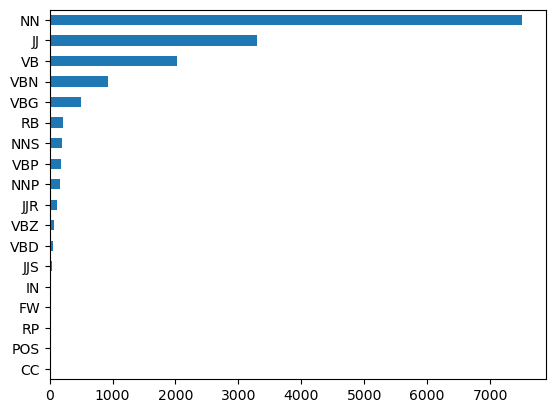

In [9]:
B.max_pos.value_counts().sort_values().plot.barh();

Sentiment by dialogue

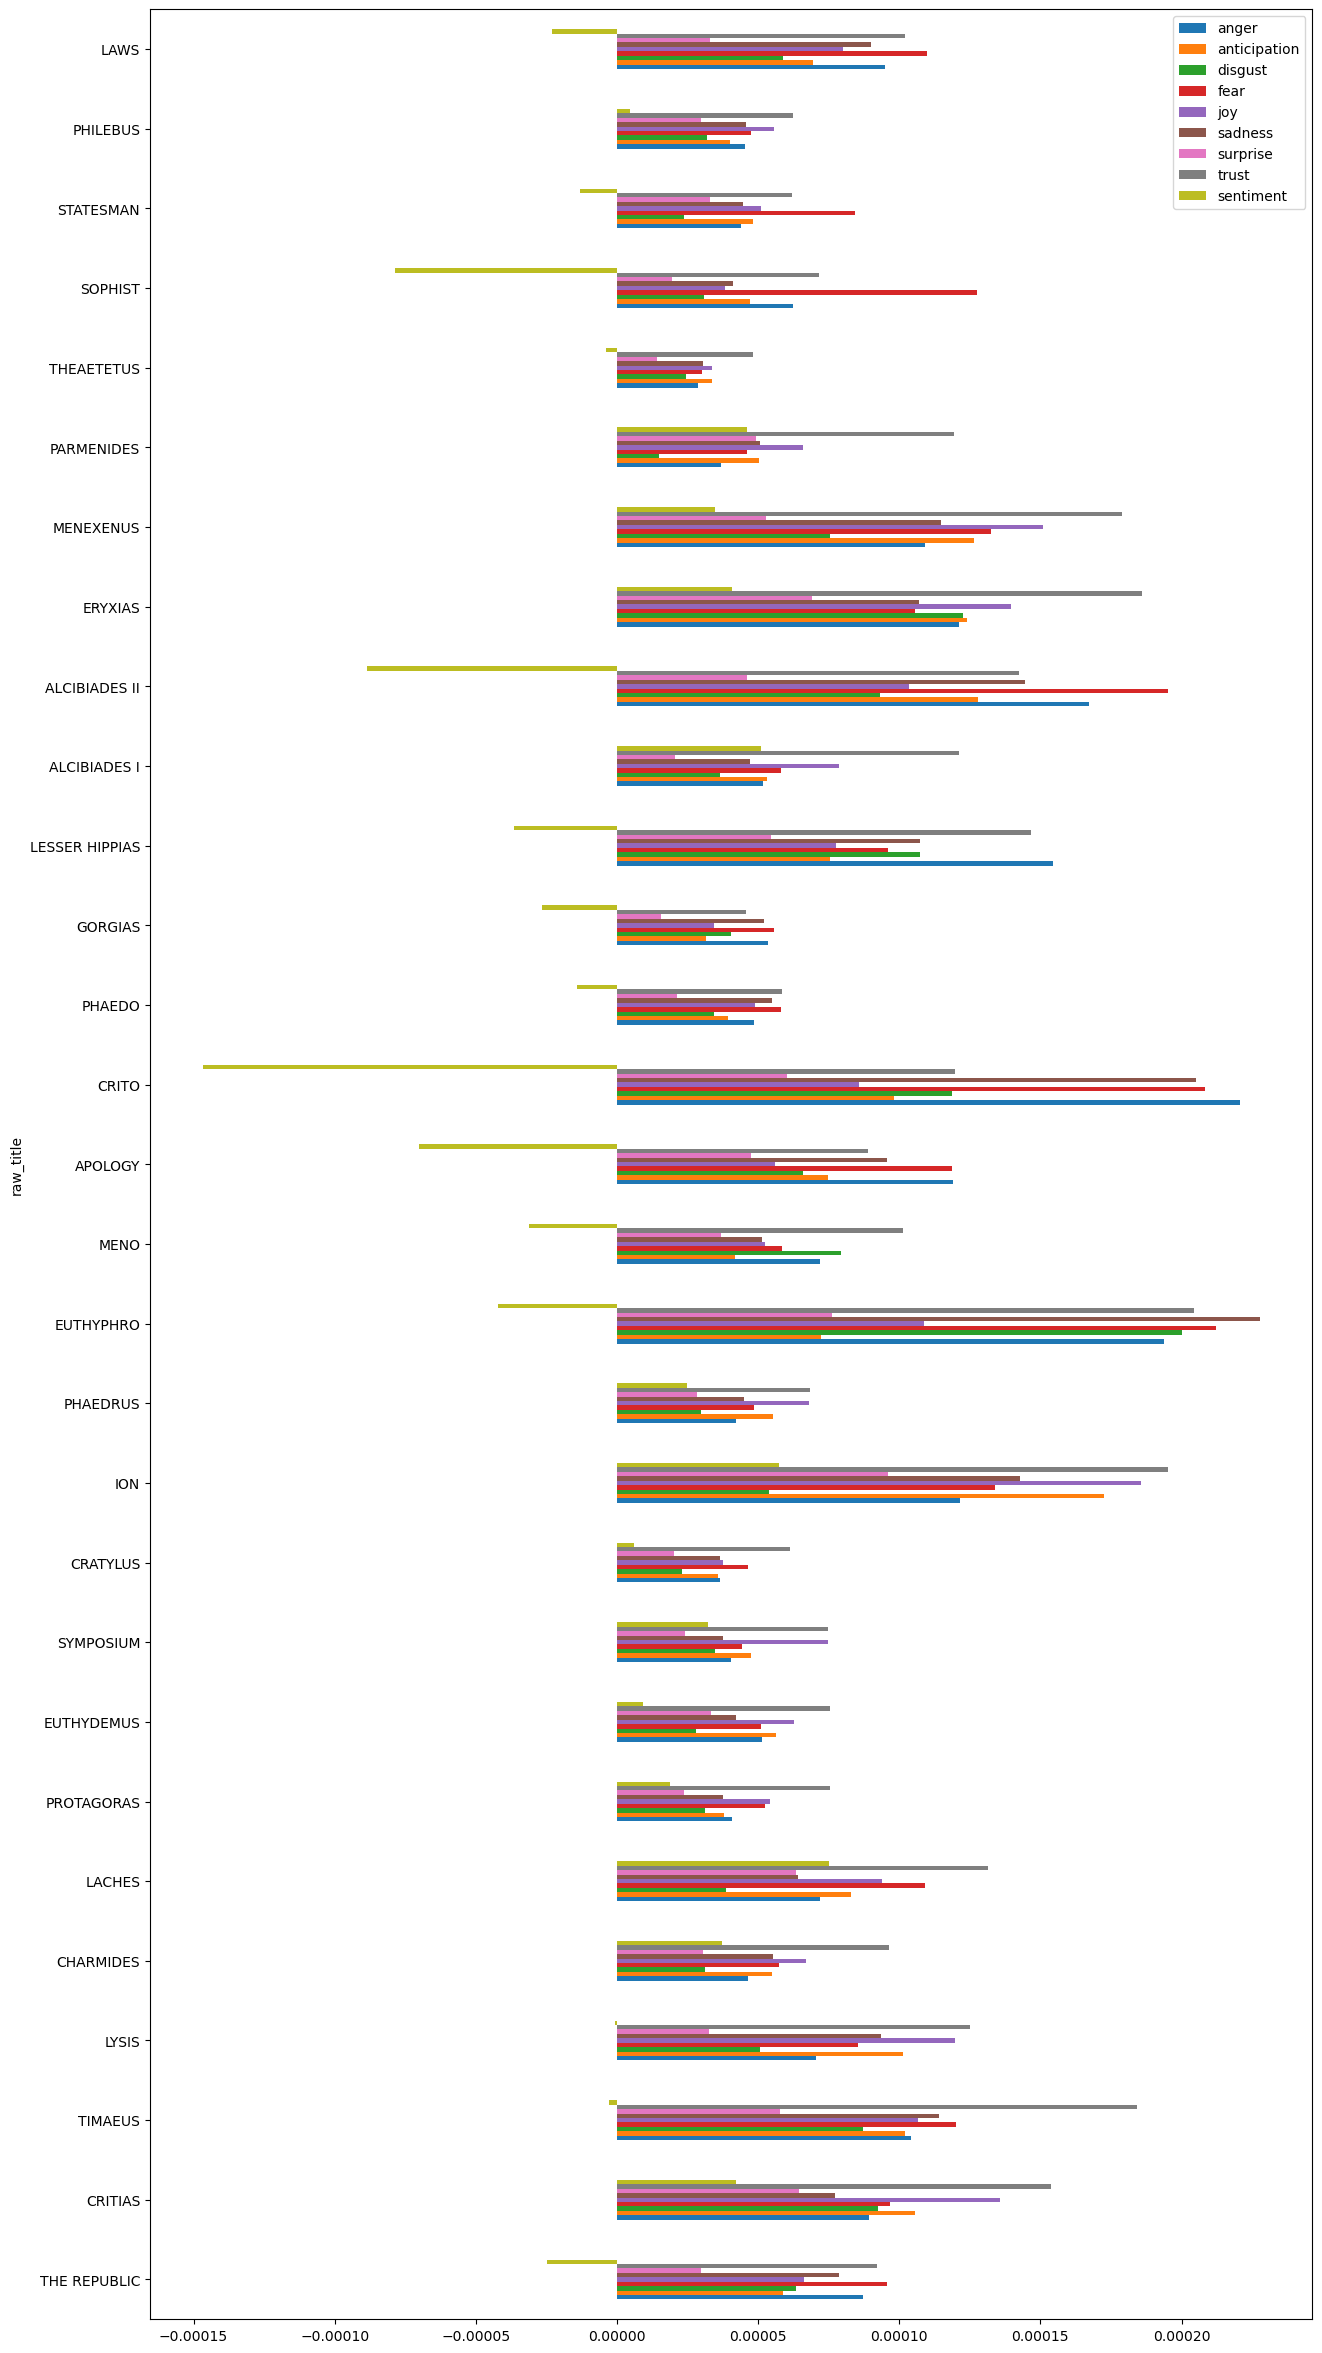

In [10]:
EMO_BOOKS = B.groupby(['book_id'])[emo_cols].mean()
EMO_BOOKS.index = LIB.raw_title
EMO_CHAPS = B.groupby(['book_id','chap_id'])[emo_cols].mean()
EMO_BOOKS.plot.barh(figsize=(15,30));

Republic Sentiments

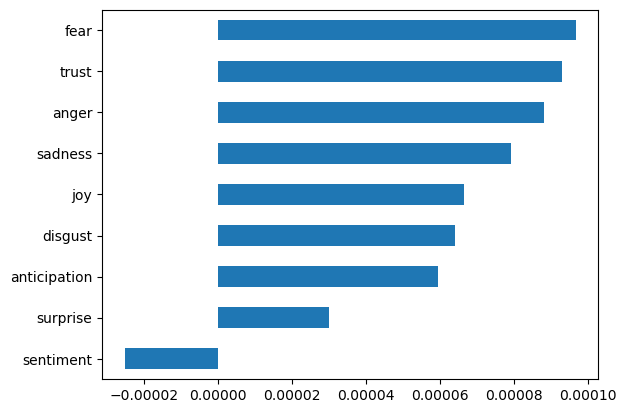

In [11]:
EMO_CHAPS.loc[republic].copy().mean().sort_values().plot.barh();

### Analysis by chapters

In [12]:
REPUBLIC_chaps = EMO_CHAPS.loc[republic] 
TIMAEUS_chaps = EMO_CHAPS.loc[timaeus]
LAWS_chaps = EMO_CHAPS.loc[laws] 

In [13]:
REPUBLIC_chaps_thin = EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(republic))
TMIAEUS_chaps_thin= EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(timaeus))
LAWS_chaps_thin= EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(laws))

In [14]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

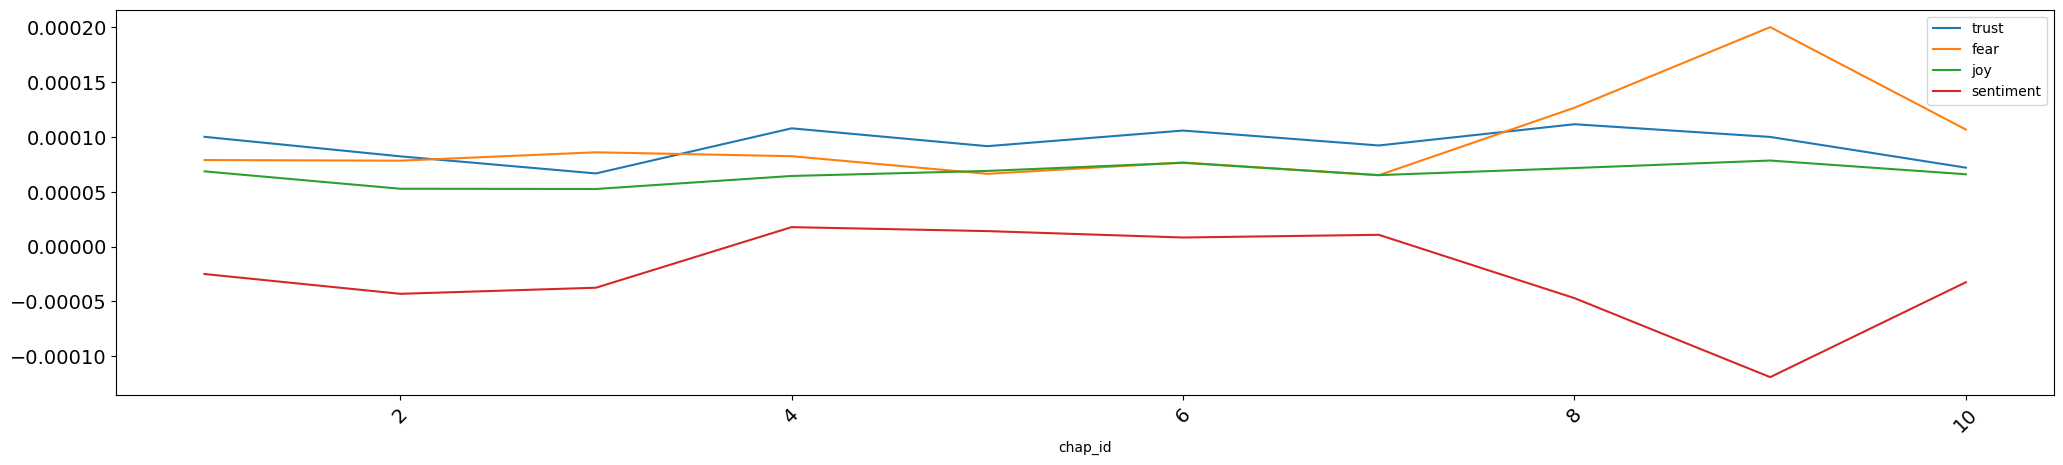

In [15]:
plot_sentiments(REPUBLIC_chaps, ['trust','fear','joy','sentiment'])

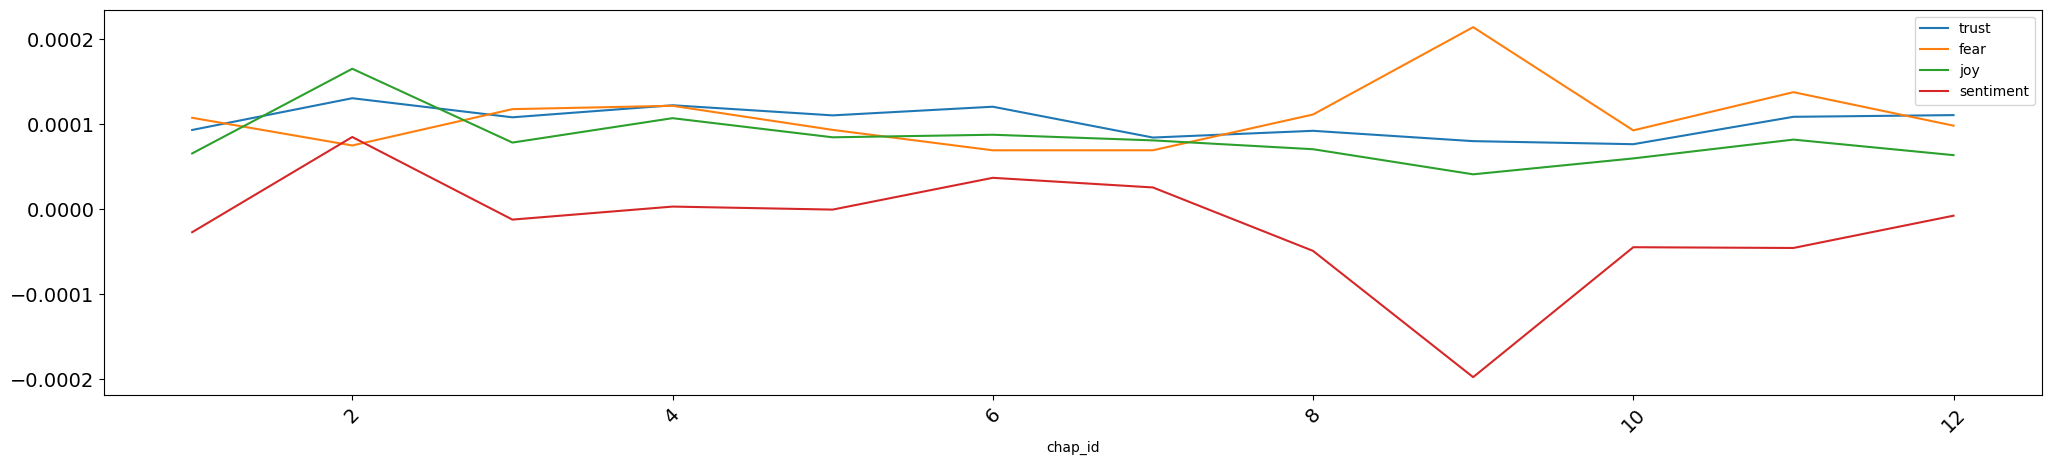

In [16]:
plot_sentiments(LAWS_chaps, ['trust','fear','joy','sentiment'])

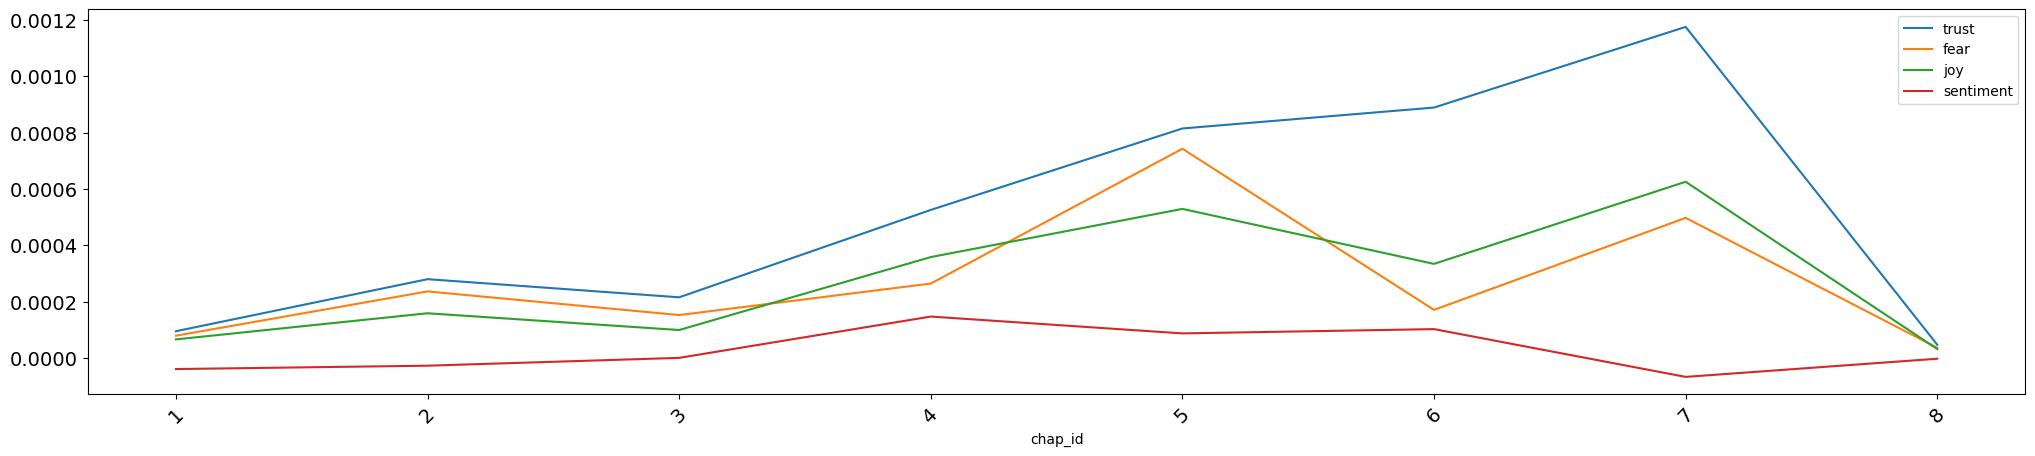

In [17]:
plot_sentiments(TIMAEUS_chaps, ['trust','fear','joy','sentiment'])

### Vader analysis

In [18]:
analyser = SentimentIntensityAnalyzer()

In [19]:
REPUBLIC2 = T.loc[republic].copy()
REPUBLIC2['html'] = REPUBLIC2.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x['sentiment'])), x.term_str), 1)
REPUBLIC_sents = REPUBLIC2.groupby(SENTS[1:])[emo_cols].mean()
REPUBLIC_sents['sent_str'] = REPUBLIC2.groupby(SENTS[1:]).term_str.apply(lambda x: x.str.cat(sep=' '))
REPUBLIC_sents['html_str'] = REPUBLIC2.groupby(SENTS[1:]).html.apply(lambda x: x.str.cat(sep=' '))

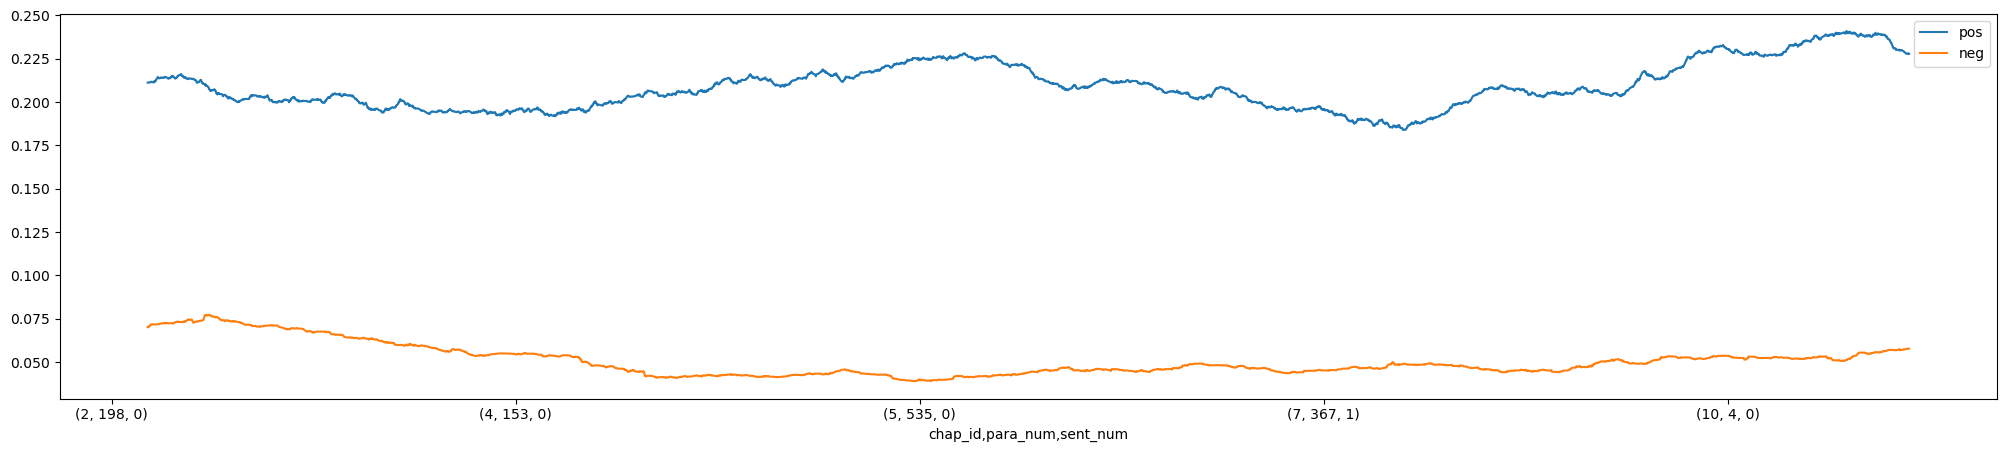

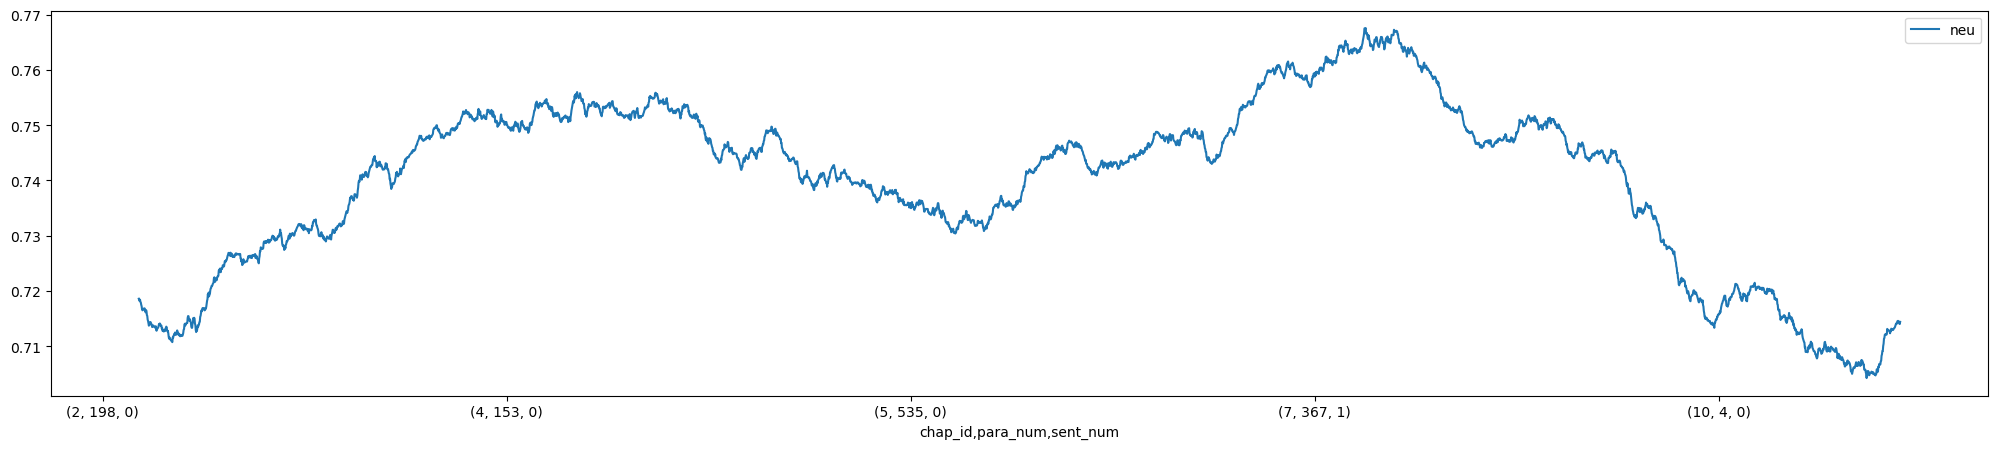

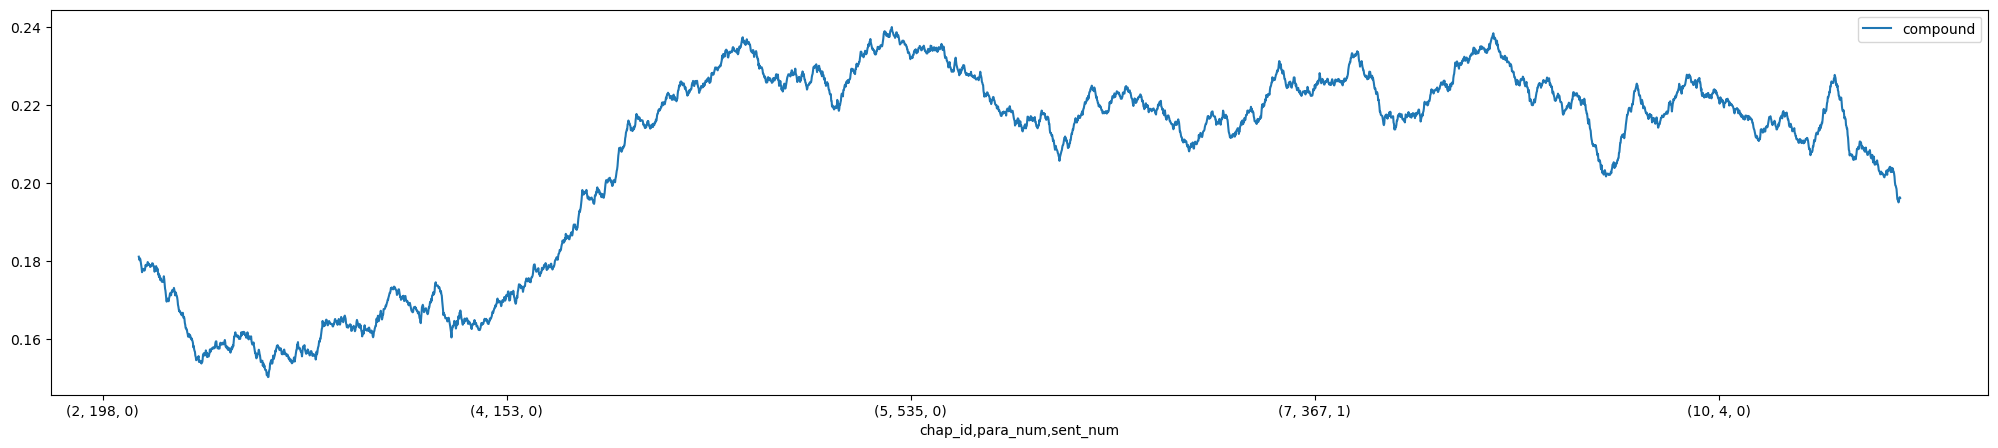

In [20]:
REPUBLIC_vader_cols = REPUBLIC_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
REPUBLIC_vader = pd.concat([REPUBLIC_sents, REPUBLIC_vader_cols], axis=1)
w = int(REPUBLIC_vader.shape[0] / 5)
REPUBLIC_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
REPUBLIC_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
REPUBLIC_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));

### EmoX analysis

In [21]:
EMOX = B[emo_cols].groupby('book_id').mean()\
    .join(LIB.raw_title).reset_index(drop=True).set_index('raw_title')
EMOX.sort_values('sentiment').style.background_gradient(cmap='Spectral', axis=None)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
raw_title,,,,,,,,,
CRITO,0.000221,0.000098,0.000119,0.000208,0.000086,0.000205,0.000060,0.000120,-0.000147
ALCIBIADES II,0.000167,0.000128,0.000093,0.000195,0.000103,0.000144,0.000046,0.000143,-0.000089
SOPHIST,0.000062,0.000047,0.000031,0.000127,0.000038,0.000041,0.000019,0.000072,-0.000079
APOLOGY,0.000119,0.000075,0.000066,0.000119,0.000056,0.000096,0.000048,0.000089,-0.000070
EUTHYPHRO,0.000194,0.000072,0.000200,0.000212,0.000109,0.000228,0.000076,0.000204,-0.000042
LESSER HIPPIAS,0.000154,0.000076,0.000107,0.000096,0.000078,0.000107,0.000055,0.000147,-0.000037
MENO,0.000072,0.000042,0.000079,0.000059,0.000052,0.000051,0.000037,0.000101,-0.000031
GORGIAS,0.000054,0.000031,0.000040,0.000056,0.000034,0.000052,0.000016,0.000046,-0.000026
THE REPUBLIC,0.000087,0.000059,0.000063,0.000096,0.000066,0.000079,0.000030,0.000092,-0.000025


<Figure size 640x480 with 0 Axes>

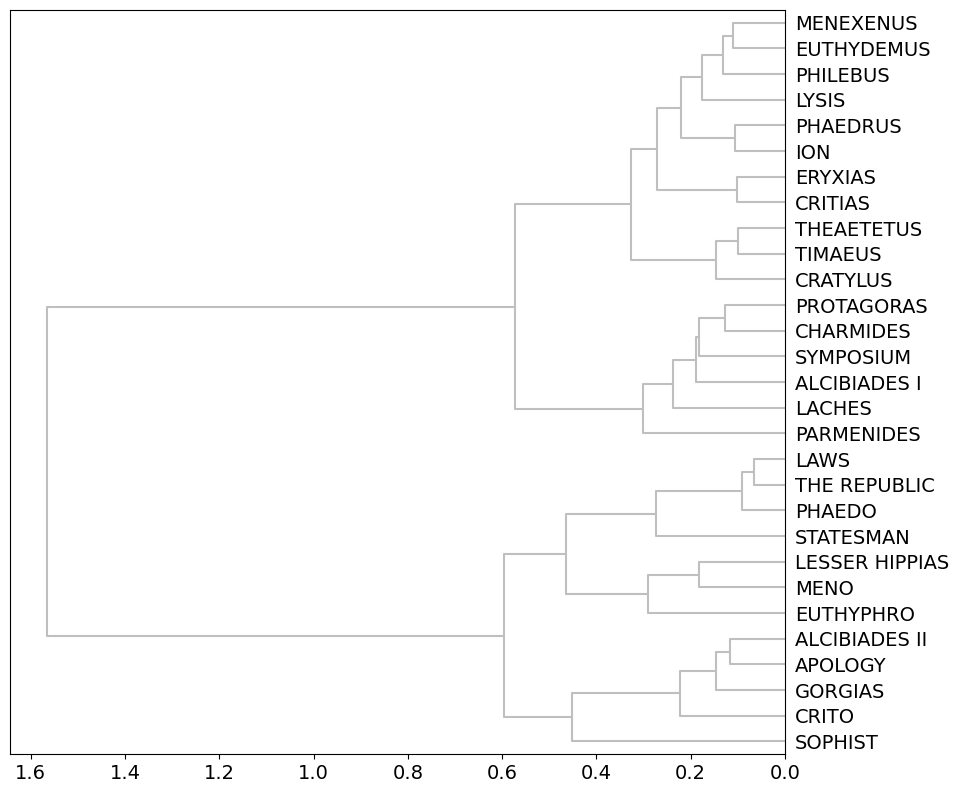

In [22]:
emo_tree = HAC(EMOX)
emo_tree.color_thresh=.03
emo_tree.plot()

### Output

In [23]:
B.to_csv(f"{data_out}/{data_prefix}-SENTBOW-CHAP.csv")
EMOX.to_csv(f"{data_out}/{data_prefix}-EMOX-CHAP.csv")